# Aula 13
### SQLite e NoSQL

In [ ]:
# !pip install sqlite3
import sqlite3

In [ ]:
con = sqlite3.connect('banco.db')

In [ ]:
cur = con.cursor()

### Criar uma tabela

In [ ]:
# char text real integer varchar
cur.execute("""
    CREATE TABLE funcionarios (id INTEGER PRIMARY KEY AUTOINCREMENT,
    nome varchar(40),
    email varchar(90),
    telefone varchar(20),
    idade INTEGER)""")
con.commit()

In [ ]:
# Mokar uns 100 regs
import random
lstNomes = [
    'Joana', 'Maria', 'Carlos', 'Soares', 'Buarque',
    'Holanda', 'Ramalho', 'José', 'Amaro', 'Camila',
    'Sobral', 'Ricardo', 'Amelia', 'Ana', 'Francisca',
    'Karla', 'Francisco', 'Antonio', 'Antonia', 'Marcos',
    'Luis', 'Gabriel', 'Raphael', 'Ezequiel', 'Samuel',
    'Miguel', 'Daniel', 'Bruno', 'Bruna', 'Eduardo']
for i in range(0, 100):
    prinome = lstNomes[(int)(random.random()*30)]
    nome = prinome + " " + lstNomes[(int)(random.random()*30)]
    idade = (int)(random.random()*42)+18
    email = prinome.lower() + "@empresa.com"
    telefone = ""
    for j in range(1,10):
        telefone += (str)((int)(random.random()*10))
    cur.execute(
        "INSERT INTO funcionarios (nome, email, telefone, idade) VALUES ('" + nome + "', '" + email + "', '" + telefone + "', " + str(idade) + ")")
con.commit()

In [ ]:
cur.execute("SELECT * FROM funcionarios")
results = cur.fetchall()
for row in results:
    print(row)

### Distribuição Normal por idade

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
mu, sigma = 0, 0.1 # média e desvio padrão
dados = np.random.normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(dados, 30, density=True)
curva_normal = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2))
plt.plot(bins, curva_normal, linewidth=2, color='r')
plt.show()

## Mostrar a Distribuição Normal por Idade?

In [ ]:
cur.execute("SELECT idade FROM funcionarios ORDER BY idade")
results = cur.fetchall()

In [ ]:
x = []
for row in results:
    x.append(row[0])

In [ ]:
import statistics

mu = statistics.mean(x)
sigma = statistics.stdev(x)

In [ ]:
count, bins, ignored = plt.hist(x, 30, density=True)
curva_normal = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - mu)**2 / (2 * sigma**2))
plt.plot(bins, curva_normal, linewidth=2, color='r')
plt.show()

Exercícios:

1. Criar um campo chamado DDD
2. Corrigir telefones conforme a seguinte regra:
   a. Que iniciam com 0 e 1 DDD = 11 - São Paulo
   b. Que iniciam com 2 e 3 DDD = 21 - Rio de Janeiro
   c. Que iniciam com 4 e 5 DDD = 31 - Minas Gerais
   d. Que iniciam com 6 e 7 DDD = 41 - Paraná
   e. Que iniciam com 8 e 9 DDD = 61 - Distrito Federal
3. Mostrar um gráfico por Estado e Qtd de Funcionários
4. Mostrar um gráfico por Idade por Estado

In [ ]:
con.close()

# NoSQL

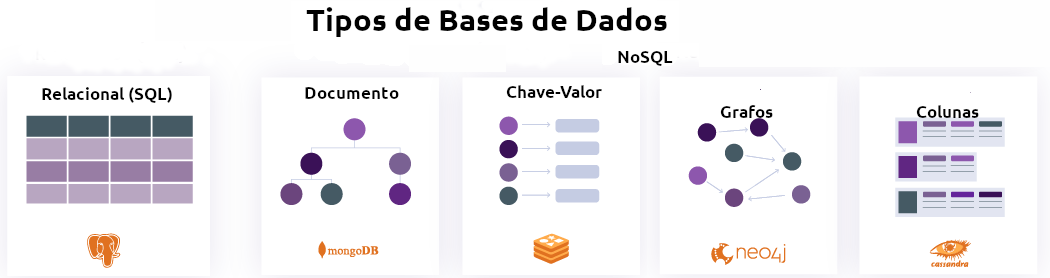

## Orientados a Documento - MongoDB

In [ ]:
!pip install pymongo

In [ ]:
from pymongo import MongoClient

In [ ]:
cliente = MongoClient('localhost', 27017)

In [ ]:
cliente.list_database_names()

### Acessar um Database

In [ ]:
db = cliente.iesb

In [ ]:
col = db.list_collection_names()

In [ ]:
for c in col:
    print(c)

### Acessar uma coleção

In [ ]:
colA = db.aluno

In [ ]:
for d in colA.find({}):
    print(d)

### Inserir um Documento

In [ ]:
import random

In [ ]:
mario = {"nome": "Mario da Silva", "nota": random.randint(1,10)}
colA.insert_one(mario)

In [ ]:
alunos = [
    {"nome": "Aline Moraes", "nota": random.randint(1,10), "sala": 10},
    {"nome": "Soraya Gomes", "nota": random.randint(1,10), "funcionario": "AJT"} 
]
colA.insert_many(alunos)

In [ ]:
cliente.drop_database('iesb')

In [ ]:
cliente.close()

## Orientados a Chave Valor - Redis

In [ ]:
!pip install redis

In [ ]:
import redis

In [ ]:
redis_db = redis.Redis(host='localhost', port=6379, db=0)

### Chave Valor

In [ ]:
redis_db.set('chave', 'valor')

In [ ]:
valor = redis_db.get('chave').decode('UTF-8')
print(valor)

In [ ]:
redis_db.set('chave', 120)

In [ ]:
redis_db.keys()

In [ ]:
redis_db.close()

### Orientados a Grafo - Neo4J 

In [ ]:
!pip install neo4j

In [ ]:
from neo4j import GraphDatabase

In [ ]:
uri = "bolt://localhost:7687"
user = "neo4j"
password = "test"
driver = GraphDatabase.driver(uri, auth=(user, password))

In [ ]:
def create_node(tx, label, **properties):
    query = f"CREATE (n:{label} {{"
    for key, value in properties.items():
        query += f"{key}: '{value}', "
    query = query[:-2] + "})"
    print(query)
    tx.run(query)

In [ ]:
def create_relationship(tx, node1_id, node2_id, rel_type):
    query = f"MATCH (n1), (n2) WHERE ID(n1) = {node1_id} AND ID(n2) = {node2_id} CREATE (n1)-[:{rel_type}]->(n2)"
    tx.run(query)

In [ ]:
with driver.session() as session:
    session.execute_write(create_node, "Pessoa", nome="William")
    session.execute_write(create_node, "Pessoa", nome="Joel")

In [ ]:
with driver.session() as session:
    session.execute_write(create_relationship, 12, 13, "AlunoDS")

In [ ]:
driver.close()

### Orientados a Coluna - Apache Cassandra

In [ ]:
!pip install cassandra-driver

In [1]:
from cassandra.cluster import Cluster
from cassandra.query import SimpleStatement

In [2]:
cluster = Cluster()
session = cluster.connect()

In [4]:
session.execute("""
    CREATE KEYSPACE teste
    WITH replication={'class': 'SimpleStrategy', 'replication_factor': 1}
""")    

In [5]:
session.execute("USE teste;")

In [6]:
session.execute("""
    CREATE TABLE usuarios(id int primary key,
    nome text, creditos int)
""")

In [9]:
session.execute(
    "INSERT INTO usuarios (nome, creditos, id) VALUES (%s, %s, %s)",
    ('Fernando', 42, 1))

In [16]:
rows = session.execute(
    "SELECT nome, creditos FROM usuarios")

In [17]:
for u in rows:
    print(u.nome, u.creditos)

Fernando 42


In [19]:
c = 2
for a in range(1,10):
    if (a % 2 == 0):
        c += 1
print(c)     

6
